In [1]:
from qiskit import IBMQ

# Load IBM Quantum Experience account
IBMQ.enable_account('263d1a36f47e402660f993f467059837de06701d10e67a7e88c93e63ec518c83efe90fc217e79d28e6a203a8fb0577853390a147ada044e770b60a68f25ceef6')

# Get the provider
provider = IBMQ.get_provider()

# Get the hub name
hub_name = provider.credentials.hub

# Print the hub name
print("Hub name:", hub_name)


<ipython-input-1-0a266e56db9e>:4: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.enable_account('263d1a36f47e402660f993f467059837de06701d10e67a7e88c93e63ec518c83efe90fc217e79d28e6a203a8fb0577853390a147ada044e770b60a68f25ceef6')
<ipython-input-1-0a266e56db9e>:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.enable_account('263d1a36f47e402660f993f467059837de0670

Hub name: ibm-q


In [3]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
import numpy as np

pi = np.pi


provider = IBMQ.get_provider(hub='ibm-q')

backend = provider.get_backend('ibmq_qasm_simulator')

q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')

circuit = QuantumCircuit(q,c)

circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])
circuit.append(QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name='qft'), q)
circuit.measure(q,c)
circuit.draw(output='mpl', filename='qft1.png')
print(circuit)

job = execute(circuit, backend, shots=1000)

job_monitor(job)

counts = job.result().get_counts()

print("\n QFT Output")
print("-------------")
print(counts)




     ┌───┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤M├────────────
     └───┘│      │└╥┘┌─┐         
q_1: ─────┤1     ├─╫─┤M├─────────
     ┌───┐│      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├─╫──╫─┤M├──────
     └───┘│      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════╩══╩══╩══╩══╩═
                   0  1  2  3  4 
Job Status: job has successfully run

 QFT Output
-------------
{'11011': 24, '00010': 20, '01111': 28, '10011': 34, '01000': 29, '11001': 36, '00110': 34, '10111': 24, '11000': 34, '11010': 34, '00001': 34, '01101': 37, '01011': 31, '00000': 44, '00100': 36, '00011': 32, '00111': 27, '10101': 23, '10000': 27, '11110': 22, '11100': 27, '01010': 33, '10001': 32, '01110': 34, '01100': 35, '01001': 24, '00101': 39, '10100': 27, '11101': 30, '10110': 35, '11111': 34, '10010': 40}


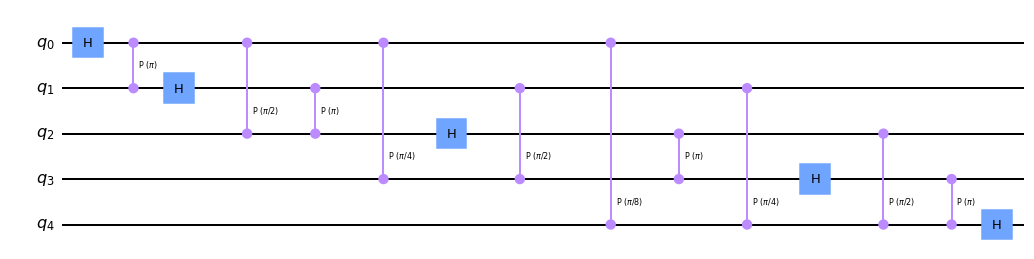

In [4]:
num_qubits = 5
qft_circuit = QuantumCircuit(num_qubits)

# Apply the Quantum Fourier Transform
for qubit in range(num_qubits):
    for j in range(qubit):
        qft_circuit.cp(2 * np.pi / 2**(qubit - j), j, qubit)
    qft_circuit.h(qubit)

# Visualize the circuit
qft_circuit.draw(output='mpl')